##Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications.vgg19 import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3, random_state=11)

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [6]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [7]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


## Building model

In [ ]:
earlystopping = keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 0, 
                                        restore_best_weights = True)

In [ ]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = y_train.shape[1])

In [ ]:
model= Sequential()
model.add(base_model) 
model.add(Flatten())

In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 21,208,394
Trainable params: 21,208,394


In [ ]:
batch_size= 100
epochs=50
learn_rate=.003
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print(x_train.shape,y_train.shape)

(35000, 32, 32, 3) (35000, 10)


## Training the model

In [ ]:
model.fit(x = x_train, y = y_train,epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = (x_val,y_val), validation_freq=1, verbose = 1)

Epoch 1/50
350/350 [==============================] - 28s 77ms/step - loss: 2.2383 - accuracy: 0.1689 - val_loss: 2.0091 - val_accuracy: 0.2103
Epoch 2/50
350/350 [==============================] - 26s 75ms/step - loss: 1.9453 - accuracy: 0.2199 - val_loss: 1.9521 - val_accuracy: 0.2149
Epoch 3/50
350/350 [==============================] - 26s 76ms/step - loss: 1.7757 - accuracy: 0.2741 - val_loss: 1.5897 - val_accuracy: 0.3661
Epoch 4/50
350/350 [==============================] - 26s 75ms/step - loss: 1.5156 - accuracy: 0.3961 - val_loss: 1.3666 - val_accuracy: 0.4614
Epoch 5/50
350/350 [==============================] - 26s 75ms/step - loss: 1.2900 - accuracy: 0.4960 - val_loss: 1.1561 - val_accuracy: 0.5597
Epoch 6/50
350/350 [==============================] - 26s 75ms/step - loss: 1.0279 - accuracy: 0.6097 - val_loss: 1.0145 - val_accuracy: 0.6325
Epoch 7/50
350/350 [==============================] - 26s 76ms/step - loss: 0.8253 - accuracy: 0.7120 - val_loss: 0.8151 - val_accuracy:

In [ ]:
model.save('my_model.h5') 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name = 'classifier.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model.save(path)

## Loading saved model

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
model_save_name = 'classifier.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model = tf.keras.models.load_model(path)

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.0299 - accuracy: 0.8269


[1.0298823118209839, 0.8269000053405762]

In [12]:
#Making prediction
y_pred=model.predict(x_test)
y_true=np.argmax(y_test,axis=1)

In [32]:
y_pred = np.argmax(y_pred,axis = 1)

In [33]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


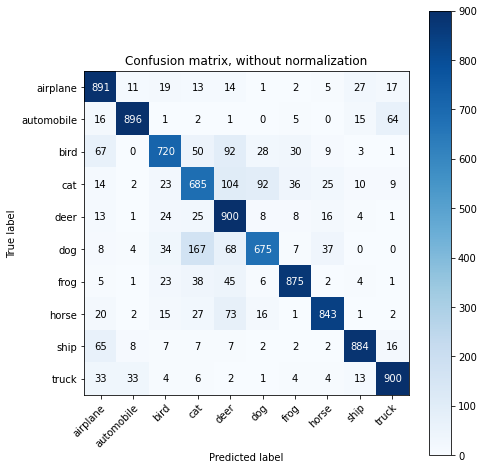

In [34]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

#Defining the class labels
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix


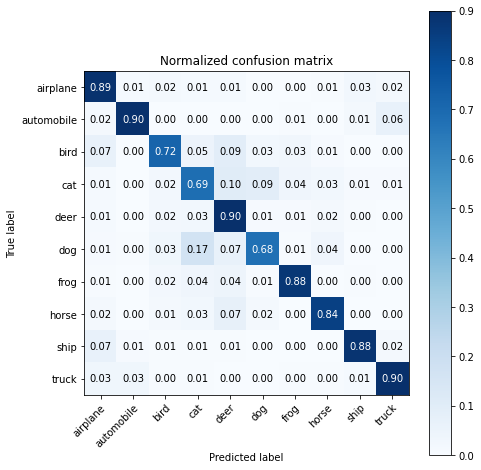

In [35]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')